# Memasukkan dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv("ILPD.csv")
data.head()

,Age,Gender,TB,DB,AAP,SGPT,SGOT,TP,Albumin,A/G,Diagnosis
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
data

,Age,Gender,TB,DB,AAP,SGPT,SGOT,TP,Albumin,A/G,Diagnosis
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [ ]:
import seaborn as sns

n_records = len(data.index)
print("Banyak Data : {}".format(n_records))

n_records_liv_pos = len(data[data['Diagnosis'] == 1])
print("\nJumlah pasien yang mungkin menderita penyakit liver {}".format(n_records_liv_pos))

n_records_liv_neg = len(data[data['Diagnosis'] == 2])
print("Jumlah pasien yang mungkin tidak menderita penyakit liver {}".format(n_records_liv_neg))

percent_liver_disease_pos = (n_records_liv_pos/n_records) * 100
print("\nPersentase pasien yang mungkin menderita penyakit liver {}%".format(percent_liver_disease_pos))

Banyak Data : 583

Jumlah pasien yang mungkin menderita penyakit liver 416
Jumlah pasien yang mungkin tidak menderita penyakit liver 167

Persentase pasien yang mungkin menderita penyakit liver 71.35506003430532%


<Axes: xlabel='Diagnosis', ylabel='count'>

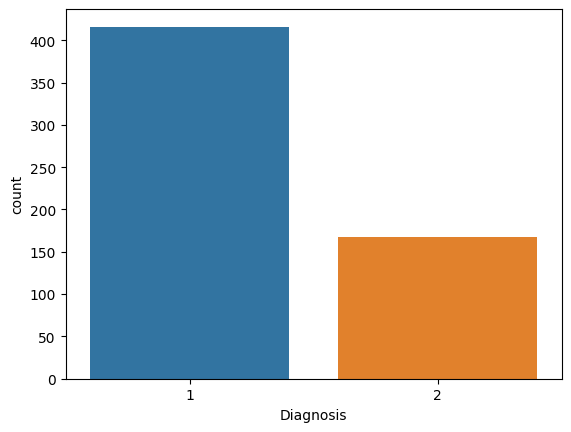

In [ ]:
sns.countplot(data = data, x = 'Diagnosis', label = 'Count')

ekplorasi data dengan melihat hasil statistika deskriptif dari variabel independen

In [ ]:
data.describe()

,Age,TB,DB,AAP,SGPT,SGOT,TP,Albumin,A/G,Diagnosis
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [ ]:
X = data.drop('Diagnosis',axis=1)
y = data['Diagnosis']

print("Jumlah data:",data.shape[0],"\nJumlah Variabel:",data.shape[1])

Jumlah data: 583 
Jumlah Variabel: 11


# Pre-Processing Data

In [ ]:
duplicates = data[data.duplicated(keep=False)]
duplicates

,Age,Gender,TB,DB,AAP,SGPT,SGOT,TP,Albumin,A/G,Diagnosis
18,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
25,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
33,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
54,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
61,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1


In [ ]:
print("No. of duplicate values:",duplicates.shape[0],"\nSize of data: ",data.shape)

No. of duplicate values: 26 
Size of data:  (583, 11)


In [ ]:
data = data[~data.duplicated(subset=None, keep='first')]
duplicates = data[data.duplicated(keep=False)]
duplicates

,Age,Gender,TB,DB,AAP,SGPT,SGOT,TP,Albumin,A/G,Diagnosis


In [ ]:
print("Size of data: ",data.shape)

Size of data:  (570, 11)


In [ ]:
data.isnull().sum()

Age          0
Gender       0
TB           0
DB           0
AAP          0
SGPT         0
SGOT         0
TP           0
Albumin      0
A/G          4
Diagnosis    0
dtype: int64

In [ ]:
data = data.dropna()
data.isnull().sum()

Age          0
Gender       0
TB           0
DB           0
AAP          0
SGPT         0
SGOT         0
TP           0
Albumin      0
A/G          0
Diagnosis    0
dtype: int64

In [ ]:
data.shape

(566, 11)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Diagnosis'] = le.fit_transform(~data['Diagnosis'])
data['Diagnosis'].unique()

X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']

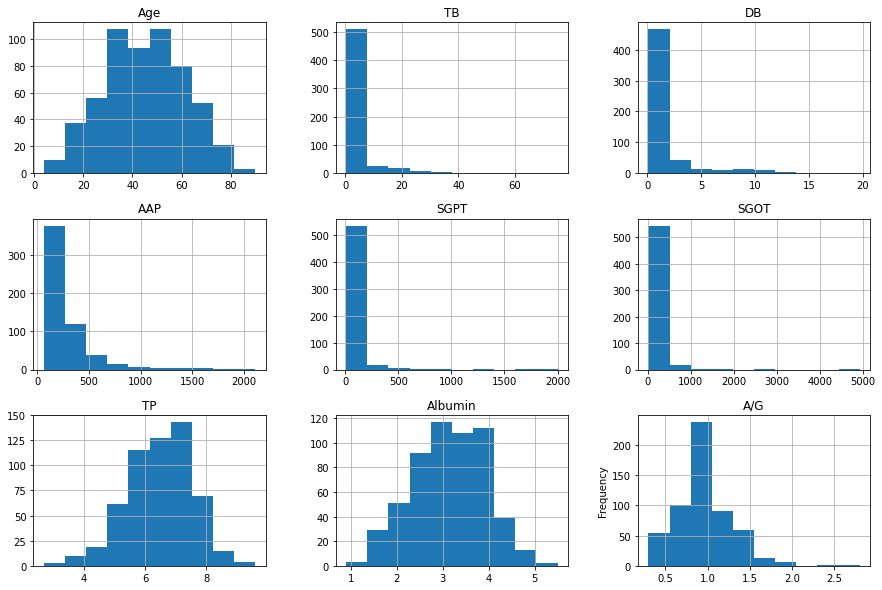

In [ ]:
X.hist(figsize=(15,10))
plt.ylabel("Frequency")
plt.show()

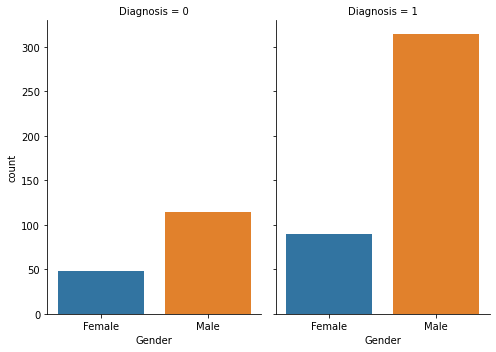

In [ ]:
sns.catplot(x="Gender",col="Diagnosis",data=data,kind="count",height=5,aspect=.7)

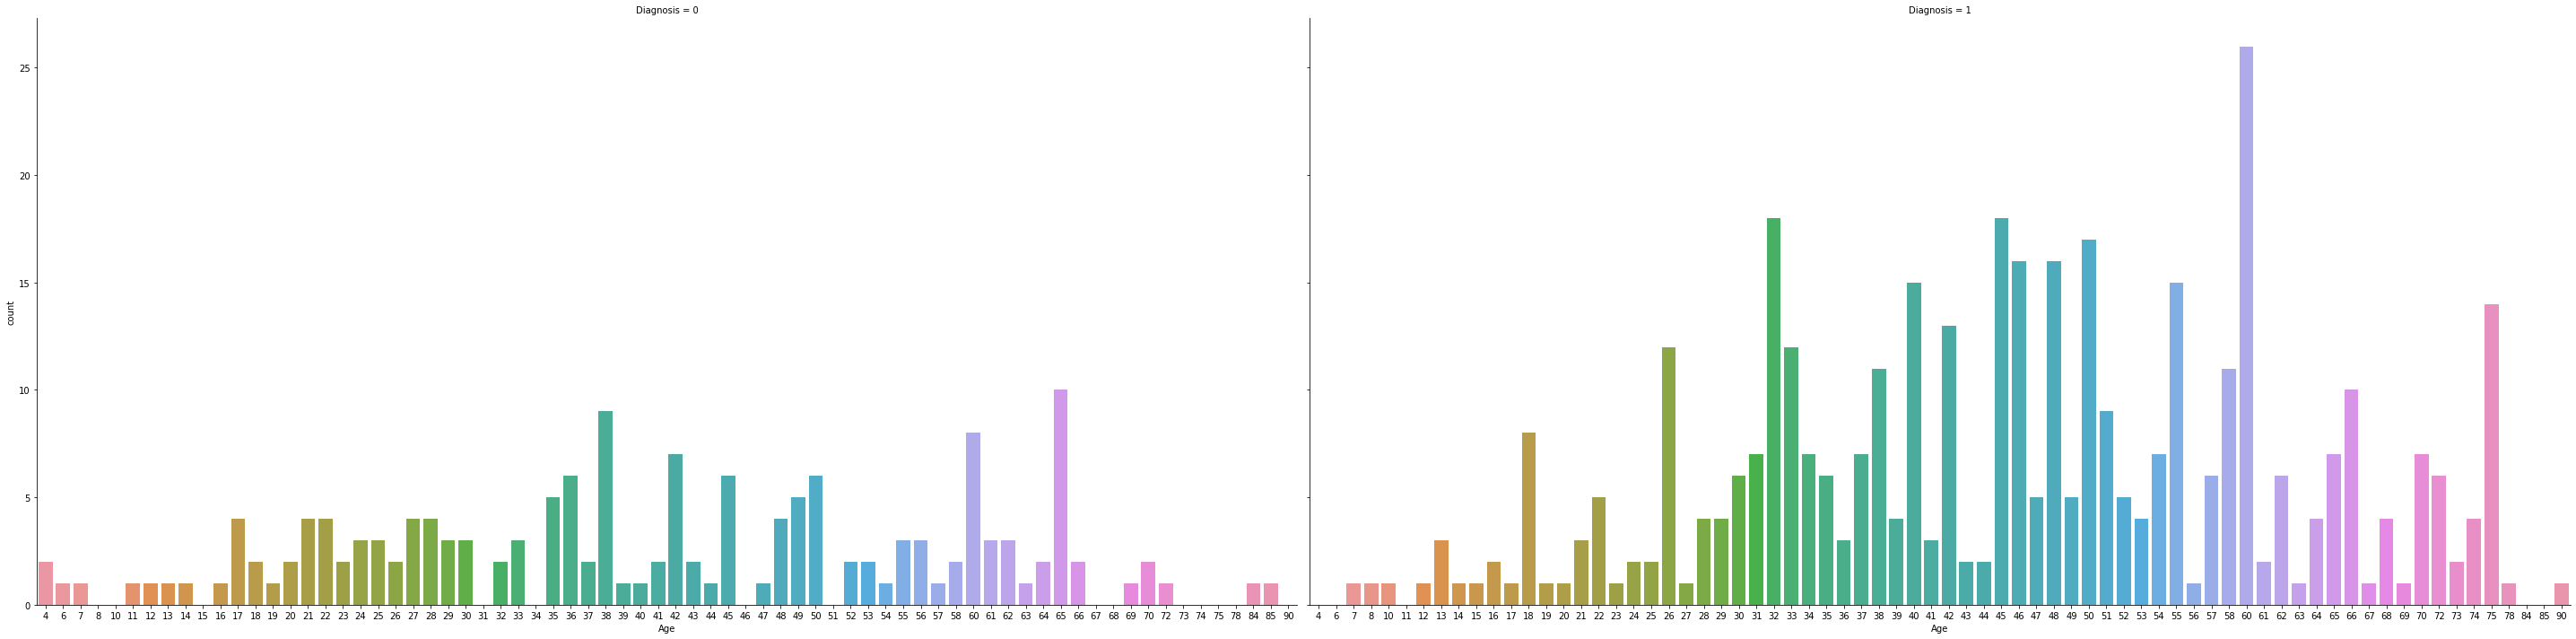

In [ ]:
sns.catplot(x="Age",col="Diagnosis",data=data,kind="count",height=10,aspect=2.0)

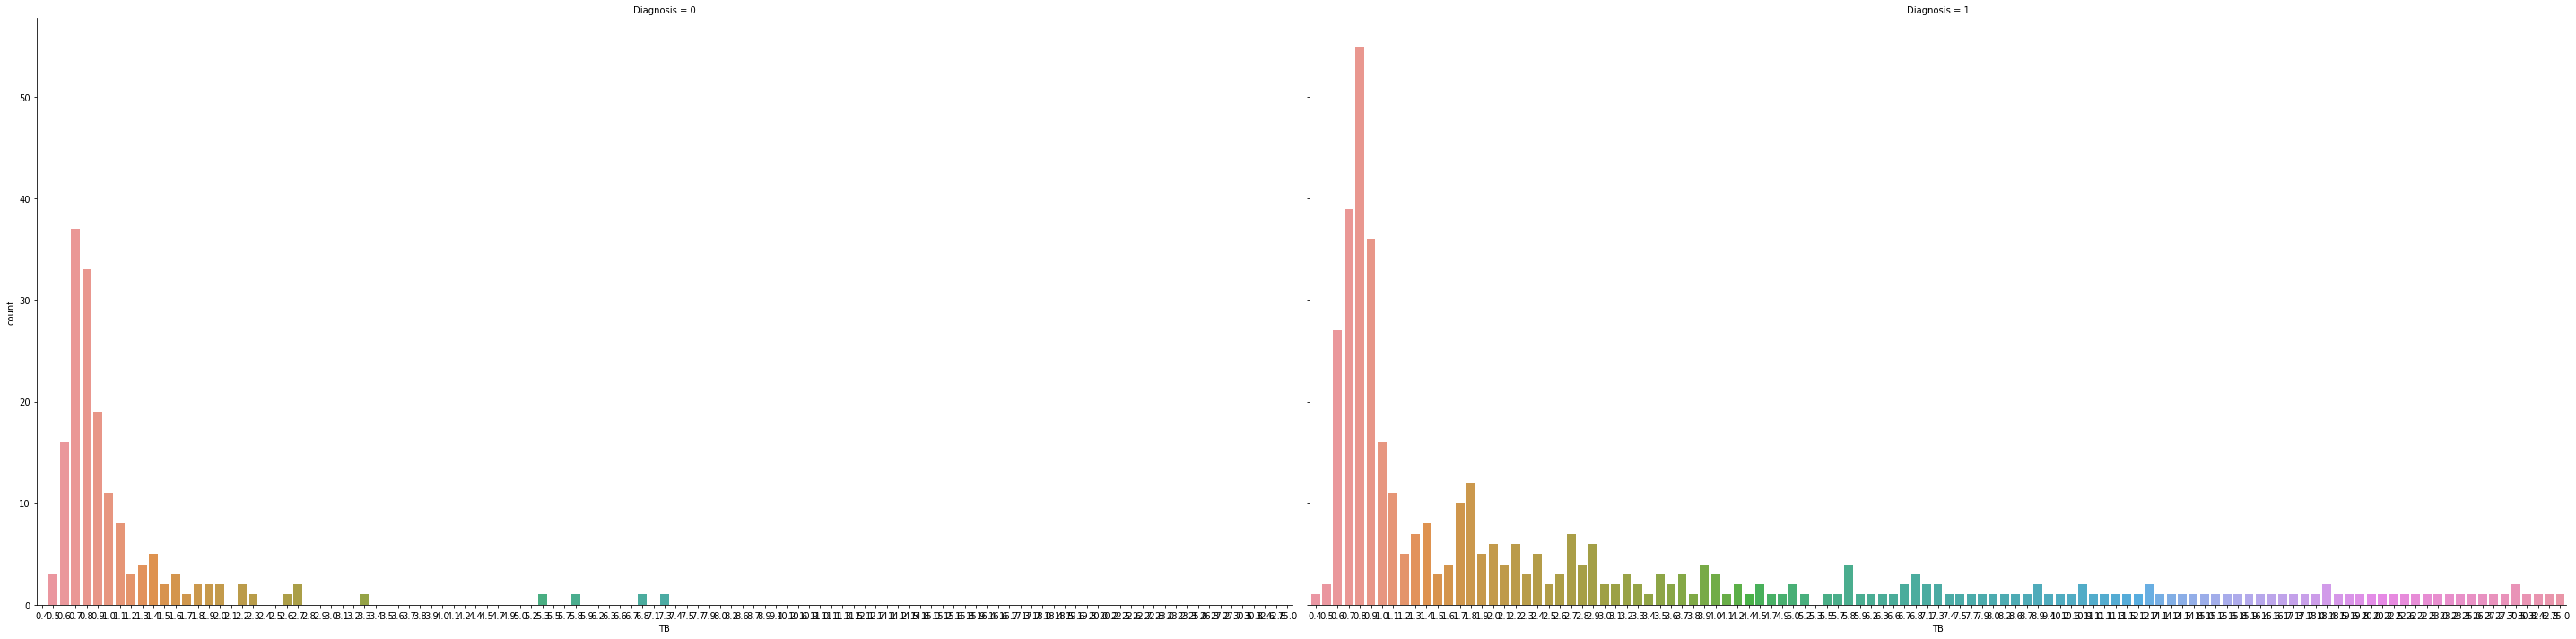

In [ ]:
sns.catplot(x="TB",col="Diagnosis",data=data,kind="count",height=10,aspect=2.0)

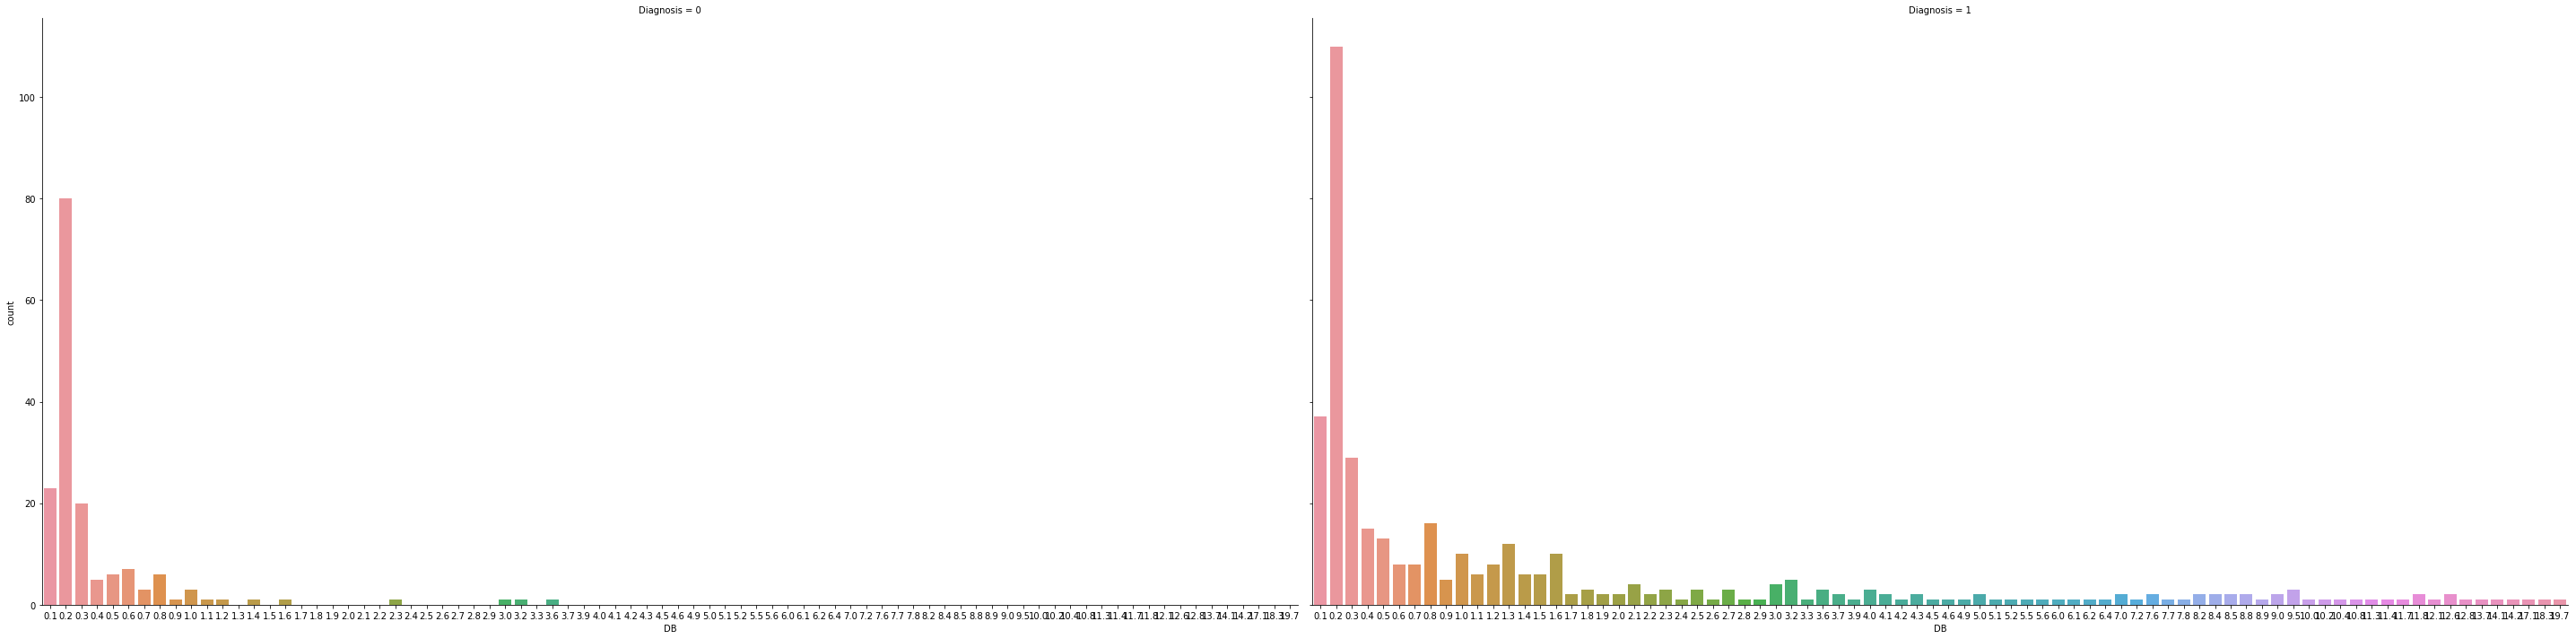

In [ ]:
sns.catplot(x="DB",col="Diagnosis",data=data,kind="count",height=10,aspect=2.0)

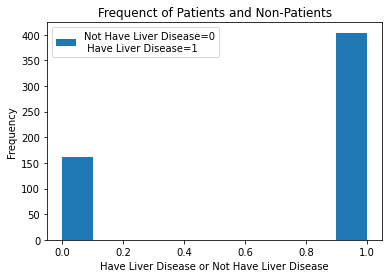

In [ ]:
plt.hist(y,label='Not Have Liver Disease=0\n Have Liver Disease=1')
plt.xlabel("Have Liver Disease or Not Have Liver Disease")
plt.ylabel("Frequency")
plt.title("Frequenct of Patients and Non-Patients")
plt.legend()
plt.show()

In [ ]:
data['Gender'] = le.fit_transform(data['Gender'])
# female = 0, male = 1

X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
# Isi semua NA dengan nilai yang sesuai
from sklearn.metrics import confusion_matrix

def confusionMatrix(actual, predicted):

    cm = confusion_matrix(actual,predicted)
    print('\nConfusion Matrix : \n' + str(cm))

    total = cm[0, 0] + cm[1, 1] + cm[0, 1] + cm[1, 0]

    accuracy = (cm[0, 0] + cm[1, 1]) / total
    print('\nAccuracy : ' + str(accuracy))

    sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    print('\nSensitivity : ' + str(sensitivity))

    precision = cm[0, 0] / (cm[0, 0] + cm[1, 0])
    print('\nPrecision : ' + str(precision))

data = data.fillna(method = 'ffill')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 3444)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 2:] = sc.fit_transform(X_train[:, 2:])
X_test[:, 2:] = sc.fit_transform(X_test[:, 2:])

print("Hasil transformasi nilai X_train : \n", X_train[:, 2:])
print("\n\nHasil transformasi nilai X_test : \n", X_test[:, 2:])
print("\n\n")

Hasil transformasi nilai X_train : 
 [[-0.40141382 -0.48644667 -0.59572361 ...  0.44918443  1.03775309
   1.07624052]
 [-0.41741656 -0.48644667  0.14374249 ...  0.62941645  0.53781768
   0.12544103]
 [ 0.62276143  0.6807671  -0.11823979 ... -0.27174362 -0.33706928
  -0.50842531]
 ...
 [-0.35340561 -0.41349581 -0.40557519 ... -1.08278769 -1.33694009
  -1.14229164]
 [-0.32140013 -0.37702038  0.30431227 ...  1.62069253  1.53768849
   0.44237419]
 [-0.40141382 -0.44997124 -0.56614497 ... -0.54209164 -0.08710158
   0.44237419]]


Hasil transformasi nilai X_test : 
 [[-4.47586071e-01 -4.69217670e-01 -4.60540839e-01 -4.76186323e-01
  -4.38160346e-01  1.34626535e+00  1.23822221e+00  3.07189665e-01]
 [-5.25941127e-01 -5.32111044e-01 -5.65147367e-01  7.80985370e-01
  -4.24636879e-02  1.64957414e+00  1.23822221e+00  3.72673771e-03]
 [-2.59533938e-01 -3.11984236e-01 -3.95612649e-01 -4.47829067e-01
  -4.94688440e-01  1.54847121e+00  1.23822221e+00  3.07189665e-01]
 [-5.10270116e-01 -5.32111044e-01 

# Feature Selection
memilih fitur

In [ ]:
Feature = data[['Age', 'Gender', 'TB', 'DB', 'AAP', 'SGPT', 'SGOT', 'TP', 'Albumin', 'A/G']]

X = Feature
y = data['HasDisease'].values
y[0:5]

In [ ]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.23692766, -1.7610932 , -0.42012372, -0.49518965, -0.4296251 ,
        -0.35265945, -0.31514841,  0.28081866,  0.19422491, -0.15031499],
       [ 1.0524316 ,  0.56782912,  1.20377711,  1.40690617,  1.65405412,
        -0.08875498, -0.03392582,  0.92505928,  0.06844539, -0.65132808],
       [ 1.0524316 ,  0.56782912,  0.63063564,  0.91377022,  0.80348975,
        -0.11074702, -0.14367122,  0.46488741,  0.19422491, -0.18162831],
       [ 0.80643685,  0.56782912, -0.37236194, -0.38951766, -0.44997353,
        -0.36365547, -0.30828933,  0.28081866,  0.32000442,  0.16281819],
       [ 1.66741847,  0.56782912,  0.08933536,  0.17406629, -0.39706761,
        -0.29218134, -0.17453712,  0.74099053, -0.93779074, -1.71598089]])

In [ ]:
data.corr()

,Age,Gender,TB,DB,AAP,SGPT,SGOT,TP,Albumin,A/G,Diagnosis
Age,1.000000,0.057542,0.010704,0.006268,0.080085,-0.084319,-0.017352,-0.195893,-0.269448,-0.215967,0.133821
Gender,0.057542,1.000000,0.089068,0.100448,-0.024879,0.083336,0.080593,-0.092049,-0.093208,-0.005611,0.077396
TB,0.010704,0.089068,1.000000,0.873975,0.205286,0.216776,0.238167,-0.008423,-0.223979,-0.207740,0.224467
DB,0.006268,0.100448,0.873975,1.000000,0.233653,0.236731,0.257965,-0.000735,-0.230650,-0.201519,0.250926
AAP,0.080085,-0.024879,0.205286,0.233653,1.000000,0.125917,0.166609,-0.028623,-0.166287,-0.236251,0.186057
SGPT,-0.084319,0.083336,0.216776,0.236731,0.125917,1.000000,0.791754,-0.035104,-0.026890,-0.006525,0.161617
SGOT,-0.017352,0.080593,0.238167,0.257965,0.166609,0.791754,1.000000,-0.022114,-0.084821,-0.072899,0.151009
TP,-0.195893,-0.092049,-0.008423,-0.000735,-0.028623,-0.035104,-0.022114,1.000000,0.783800,0.234576,-0.036443
Albumin,-0.269448,-0.093208,-0.223979,-0.230650,-0.166287,-0.026890,-0.084821,0.783800,1.000000,0.687438,-0.165273
A/G,-0.215967,-0.005611,-0.207740,-0.201519,-0.236251,-0.006525,-0.072899,0.234576,0.687438,1.000000,-0.171402


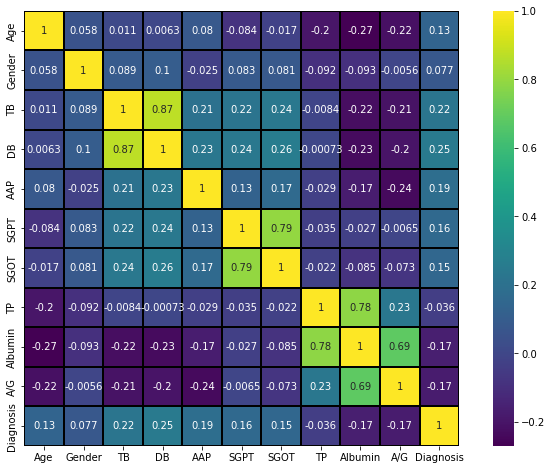

In [ ]:
plt.figure(figsize = (12, 8))
sns.heatmap(data.corr(), annot = True, linewidths=0.25,vmax=1.0,cmap='viridis', linecolor='black',square=True)
plt.show()

# Model Comparing

--Using SVM Classifier--
Akurasi SVM Classifier adalah 85.08771929824562
Precision: 0.8508771929824561
Recall: 1.0


Text(0.5, 1.0, 'Confusion Matrix')

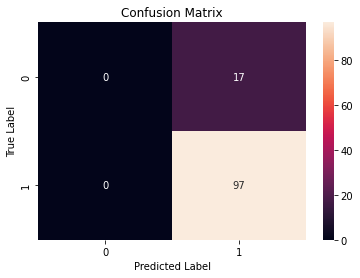

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

clf = svm.SVC(shrinking = True, kernel = 'linear')
clf.fit(X_train,y_train)
pred_svm = clf.predict(X_test)
acc_svm = accuracy_score(y_test, pred_svm) * 100

print('--Using SVM Classifier--')
print("Akurasi SVM Classifier adalah",acc_svm)
print("Precision:",metrics.precision_score(y_test, pred_svm))
print("Recall:",metrics.recall_score(y_test, pred_svm))

cnf_matrix = metrics.confusion_matrix(y_test, pred_svm)
sns.heatmap(cnf_matrix,annot=True,cbar=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

--Using Logistic Regression--
Akurasi Logistic Regression adalah 76.31578947368422
Precision: 0.8571428571428571
Recall: 0.865979381443299


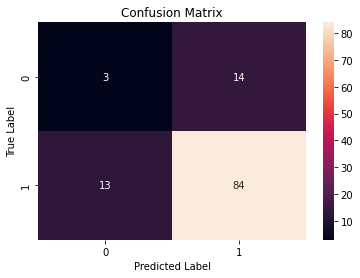

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 3444)

reg = LogisticRegression(solver='newton-cg')

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred) * 100

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix,annot=True,cbar=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')


print('--Using Logistic Regression--')
print("Akurasi Logistic Regression adalah",accuracy)
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

# Result

In [ ]:
model_comparations =[['SVM', acc_svm],
                     ['Logistic Regression', accuracy]]

model_comparations_df = pd.DataFrame(model_comparations, columns = ['Model', 'Accuracy'])

model_comparations_df

,Model,Accuracy
0,SVM,85.087719
1,Logistic Regression,76.315789


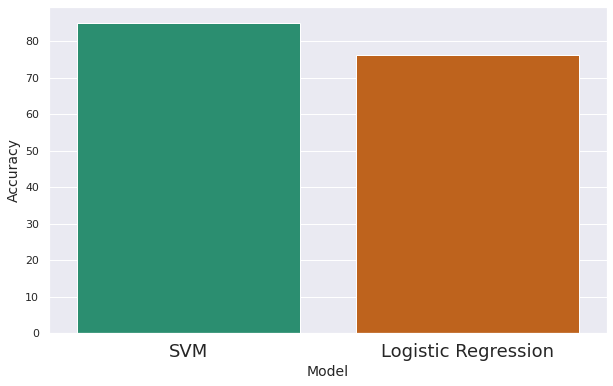

In [ ]:
fig = plt.figure(figsize = (10, 6))
sns.set()
sns.barplot(x = 'Model', y = 'Accuracy', data = model_comparations_df, palette = 'Dark2')

plt.xticks(size = 18)
plt.ylabel('Accuracy', size = 14)
plt.xlabel('Model', size = 14)
plt.show()